
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle

Cite this work: Fernández-Godino, M. G. (2023). Review of multi-fidelity models. arXiv preprint arXiv:1609.07196.


# Multi-Fidelity Modeling Toy Problem 2: Comprehensive Correction

## Overview
The presented code is a Python implementation designed to visualize High-Fidelity (HF) and Low-Fidelity (LF) functions and to conduct sensitivity analysis. The code leverages the Matplotlib and NumPy libraries for plotting and numerical operations, respectively. It encapsulates functionality into three classes: `FunctionVisualizer`, `ComprehensiveFunctionVisualizer`, and `SensitivityAnalysis`.

---

### FunctionVisualizer Class

#### Attributes
- **lb**: Lower bound of the domain for function visualization.
- **ub**: Upper bound of the domain for function visualization.
- **x**: NumPy array containing equidistant points within [lb, ub] at which function evaluations are carried out.

#### Methods
- **\_\_init\_\_(lb, ub)**: Initializes an object with specified lower and upper bounds for the domain.
- **func_HF(x)**: Evaluates the High-Fidelity function (HF) at a given point \( x \).
- **func_LF(x)**: Evaluates the Low-Fidelity function (LF) at a given point \( x \).
- **visualize()**: Generates a plot of both HF and LF functions within the specified domain.

---

### ComprehensiveFunctionVisualizer Class

#### Attributes
- **x_sampHF**: NumPy array representing the points at which the HF function is sampled.

#### Methods
- Inherits all methods from `FunctionVisualizer`.
- **func_X(x)**: Transforms the input \( x \) into a design matrix \( X \) by considering additional features.
- **func_coef(X, Y, W=1)**: Computes the model coefficients using weighted least squares.
- **func_comprehensive(x)**: Constructs a comprehensive model by combining HF and LF information.
- **visualize_comprehensive()**: Generates a plot incorporating HF, LF, and the comprehensive model along with HF sampling points.

---

### SensitivityAnalysis Class

#### Attributes
- **coef**: Dictionary containing coefficients 'A', 'B', and 'C' for LF function adjustments.

#### Methods
- Inherits the relevant methods for HF and LF functions, comprehensive model, and weighted least squares from previous classes.
- **plot_sensitivity(x, x_sampHF, coef_key, coef_val_range, plot_title)**: Generates sensitivity plots to analyze the impact of changing individual coefficients within specified ranges.

---

## Example Usage

### Function Visualization
```python
visualizer = FunctionVisualizer(0, 1)
visualizer.visualize()
```

### Comprehensive Modeling
```python
visualizer = ComprehensiveFunctionVisualizer(0, 1, np.array([0.1, 0.5, 0.9]))
visualizer.visualize_comprehensive()
```

### Sensitivity Analysis
```python
x = np.linspace(0, 1, 100)
x_sampHF = np.array([0.1, 0.5, 0.9])
sensitivity = SensitivityAnalysis()
sensitivity.plot_sensitivity(x, x_sampHF, 'A', np.linspace(-1.3, 2.7, 10), 'A_Sensitivity')
```


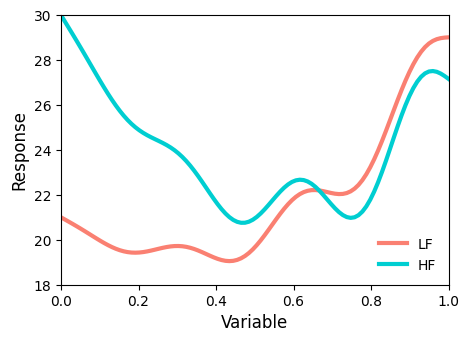

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class FunctionVisualizer:
    """
    This class is designed to visualize High-Fidelity (HF) and Low-Fidelity (LF) functions.

    Attributes:
        lb (float): Lower bound of the domain.
        ub (float): Upper bound of the domain.
        x (np.ndarray): Array containing points at which function evaluations are performed.
    """

    def __init__(self, lb, ub):
        """
        Initialize the FunctionVisualizer object with lower and upper bounds.

        Parameters:
            lb (float): Lower bound of the domain.
            ub (float): Upper bound of the domain.
        """
        self.lb = lb
        self.ub = ub
        self.x = np.linspace(self.lb, self.ub, 100)

    def func_HF(self, x):
        """
        High-Fidelity function (HF).

        Parameters:
            x (float): Point at which the HF function is evaluated.

        Returns:
            float: Value of the HF function at x.
        """
        return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1)**2

    def func_LF(self, x):
        """
        Low-Fidelity function (LF).

        Parameters:
            x (float): Point at which the LF function is evaluated.

        Returns:
            float: Value of the LF function at x.
        """
        return 1.4 * x * np.sin(20 * x + 2) + 7 * np.exp(x) + 14 * (x - 1)**2 + 10 * x

    def visualize(self):
        """
        Generate the plot visualizing the HF and LF functions.
        """
        fHF = self.func_HF(self.x)
        fLF = self.func_LF(self.x)

        plt.figure(figsize=[5, 3.5])
        plt.plot(self.x, fLF, c='salmon', linewidth=3, label='LF')
        plt.plot(self.x, fHF, c='darkturquoise', linewidth=3, label='HF')
        plt.xlim([self.lb, self.ub])
        plt.ylim([18, 30])
        plt.legend(frameon=False)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        plt.savefig('Functions.png', dpi=1000, bbox_inches='tight', transparent=True)


if __name__ == "__main__":
    visualizer = FunctionVisualizer(0, 1)
    visualizer.visualize()


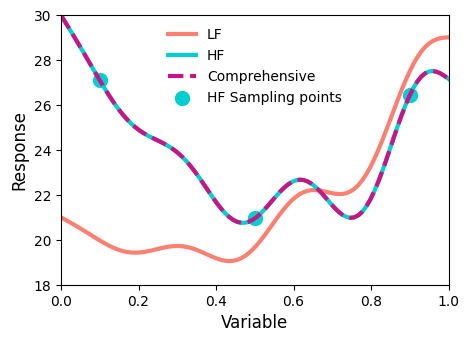

In [3]:
class ComprehensiveFunctionVisualizer(FunctionVisualizer):
    """
    Extends the FunctionVisualizer to incorporate comprehensive modeling.

    Attributes:
        x_sampHF (np.ndarray): Points at which HF function is sampled.
    """

    def __init__(self, lb, ub, x_sampHF):
        """
        Initialize the ComprehensiveFunctionVisualizer object.

        Parameters:
            lb (float): Lower bound of the domain.
            ub (float): Upper bound of the domain.
            x_sampHF (np.ndarray): Points at which HF function is sampled.
        """
        super().__init__(lb, ub)
        self.x_sampHF = x_sampHF

    def func_X(self, x):
        """
        Expand the feature space into a design matrix X.

        Parameters:
            x (float or np.ndarray): Input variable.

        Returns:
            np.ndarray: Design matrix.
        """
        return np.array([self.func_LF(x), x, x ** 2]).T

    def func_coef(self, X, Y, W=1):
        """
        Compute model coefficients using weighted least squares.

        Parameters:
            X (np.ndarray): Design matrix.
            Y (np.ndarray): Response vector.
            W (np.ndarray or int): Weight matrix. Default is identity.

        Returns:
            np.ndarray: Model coefficients.
        """
        if W == 1:
            W = np.diag(np.ones(len(X)))
        return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

    def func_comprehensive(self, x):
        """
        Generate the comprehensive model.

        Parameters:
            x (np.ndarray): Input variable array.

        Returns:
            np.ndarray: Comprehensive model values.
        """
        X = self.func_X(x)
        Y = self.func_HF(self.x_sampHF)
        B = self.func_coef(self.func_X(self.x_sampHF), Y)
        return ((B[0]) * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]

    def visualize_comprehensive(self):
        """
        Visualize HF, LF, and comprehensive model along with sampling points.
        """
        self.visualize()
        plt.plot(self.x, self.func_comprehensive(self.x), '--', c='mediumvioletred', linewidth=3, label='Comprehensive')
        plt.scatter(self.x_sampHF, self.func_HF(self.x_sampHF), 100, c='darkturquoise', label='HF Sampling points')
        plt.legend(frameon=False)
        plt.savefig('Comprehensive.png', dpi=1000, bbox_inches='tight', transparent=True)


if __name__ == "__main__":
    visualizer = ComprehensiveFunctionVisualizer(0, 1, np.array([0.1, 0.5, 0.9]))
    visualizer.visualize_comprehensive()


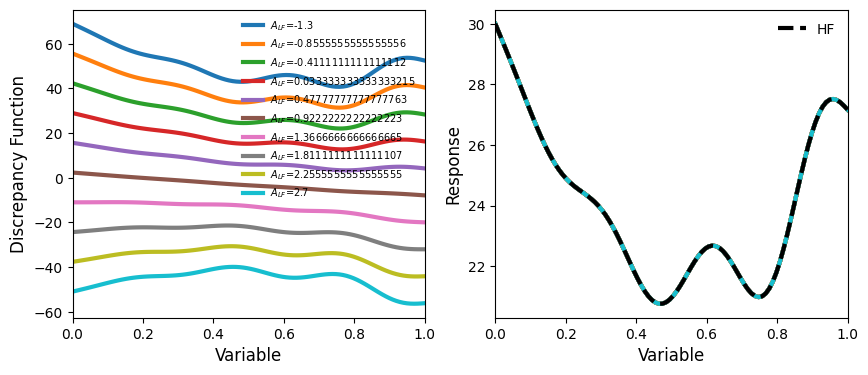

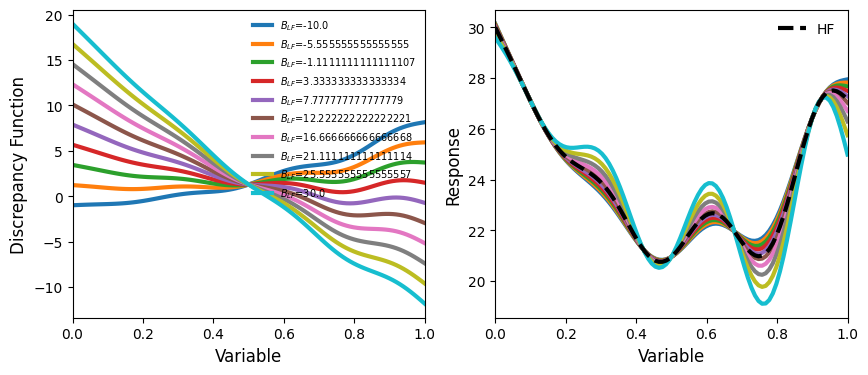

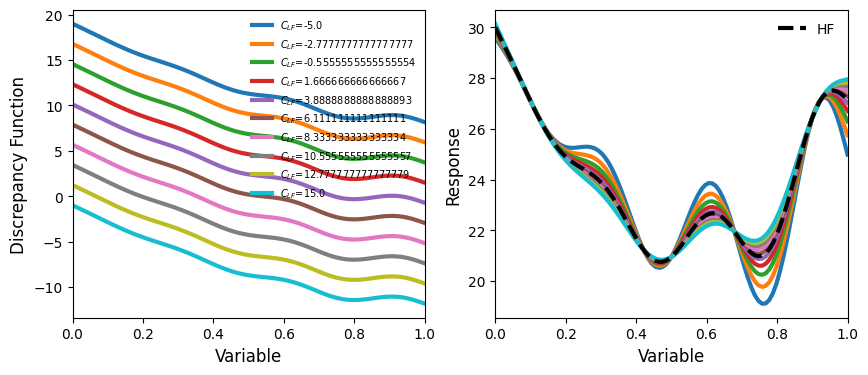

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class SensitivityAnalysis:
    def __init__(self):
        # Initialize default coefficients
        self.coef = {'A': 0.7, 'B': 10, 'C': 5}

    def func_HF(self, x):
        """High-fidelity function (HF)"""
        return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1) ** 2

    def func_LF(self, x):
        """Low-fidelity function (LF)"""
        return self.coef['A'] * self.func_HF(x) + self.coef['B'] * (x - 0.5) + self.coef['C']

    def func_X(self, x):
        """Matrix X with columns as feature vectors"""
        return np.array([self.func_LF(x), x, x ** 2]).T

    def func_coef(self, X, Y, W=1):
        """Calculates the linear coefficients using Weighted Least Squares."""
        if np.mean(W) == 1:
            W = np.diag(np.ones(len(X)))
        return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

    def func_comprehensive(self, x, x_sampHF):
        """Comprehensive function that combines HF and LF models"""
        X = self.func_X(x)
        Y = self.func_HF(x_sampHF)
        B = self.func_coef(self.func_X(x_sampHF), Y)
        return ((B[0]) * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]

    def plot_sensitivity(self, x, x_sampHF, coef_key, coef_val_range, plot_title):
        """Generate plots to analyze sensitivity of model parameters"""
        
        # Store default coefficients to restore later
        original_coef_value = self.coef[coef_key]
        
        plt.figure(figsize=[10, 4])
        
        for val in coef_val_range:
            self.coef[coef_key] = val  # Modify the coefficient for sensitivity analysis
            label = f"${coef_key}_{{LF}}$={val}"

            # Plot discrepancy between HF and LF
            plt.subplot(1, 2, 1)
            plt.plot(x, self.func_HF(x) - self.func_LF(x), linewidth=3, label=label)

            # Plot comprehensive function
            plt.subplot(1, 2, 2)
            plt.plot(x, self.func_comprehensive(x, x_sampHF), linewidth=3)

        # Configure discrepancy plot
        plt.subplot(1, 2, 1)
        plt.xlim([0, 1])
        plt.legend(frameon=False, fontsize=7)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Discrepancy Function', fontsize=12)

        # Configure comprehensive function plot
        plt.subplot(1, 2, 2)
        plt.xlim([0, 1])
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        plt.plot(x,self.func_HF(x),'k--',linewidth=3,label='HF')
        plt.legend(frameon=False, fontsize=10)

        plt.savefig(f"{plot_title}.png", dpi=1000, bbox_inches='tight', transparent=True)
        
        # Restore original coefficient value
        self.coef[coef_key] = original_coef_value

# Example usage
x = np.linspace(0, 1, 100)
x_sampHF = np.array([0.1, 0.5, 0.9])

# Initialize SensitivityAnalysis object
sensitivity = SensitivityAnalysis()

# Set coefficient value ranges for analysis
coef_val_range_A = np.linspace(-1.3, 2.7, 10)
coef_val_range_B = np.linspace(-10, 30, 10)
coef_val_range_C = np.linspace(-5, 15, 10)

# Perform sensitivity analysis for each coefficient
sensitivity.plot_sensitivity(x, x_sampHF, 'A', coef_val_range_A, 'A_Sensitivity')
sensitivity.plot_sensitivity(x, x_sampHF, 'B', coef_val_range_B, 'B_Sensitivity')
sensitivity.plot_sensitivity(x, x_sampHF, 'C', coef_val_range_C, 'C_Sensitivity')


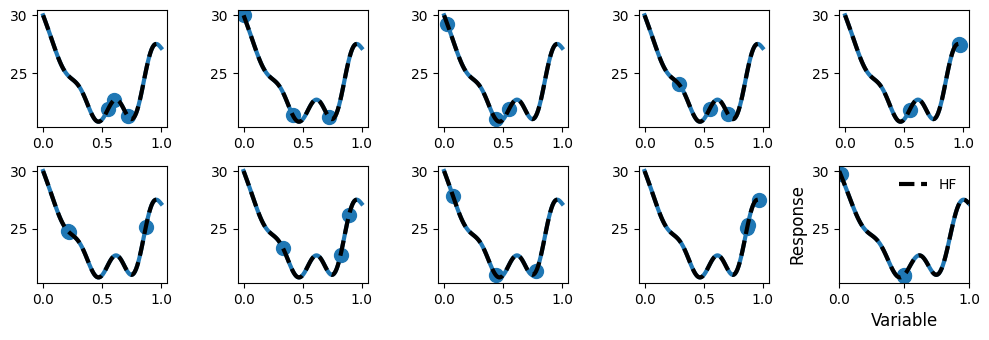

In [7]:

class AdvancedFunctionVisualizer:
    """The class encompasses methods for computing a comprehensive model that integrates low-fidelity (LF) and high-fidelity (HF) data, and for visualizing these models."""
    
    def __init__(self, lb=0, ub=1):
        """
        Initialize the AdvancedFunctionVisualizer class.
        
        Parameters:
            lb (float): Lower bound of the variable space.
            ub (float): Upper bound of the variable space.
        """
        
        # Constant coefficient for LF model
        self.A = 0.7
        self.B = 10
        self.C = 5
        
        # Setting the lower and upper bounds
        self.lb = lb
        self.ub = ub
        
        # Discretize the variable space
        self.x = np.linspace(self.lb, self.ub, 100)
    
    def func_HF(self, x):
        """
        Define the high-fidelity (HF) model.
        
        Parameters:
            x (array): Independent variable.
            
        Returns:
            array: Values of the HF model at x.
        """
        return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1) ** 2
    
    def func_LF(self, x):
        """
        Define the low-fidelity (LF) model.
        
        Parameters:
            x (array): Independent variable.
            
        Returns:
            array: Values of the LF model at x.
        """
        return self.A * self.func_HF(x) + self.B * (x - 0.5) + self.C
    
    def func_X(self, x):
        """
        Generate the design matrix X, incorporating LF, x, and x^2.
        
        Parameters:
            x (array): Independent variable.
        
        Returns:
            array: Design matrix X.
        """
        return np.array([self.func_LF(x), x, x ** 2]).T
    
    def func_coef(self, X, Y, W=None):
        """
        Estimate coefficients using weighted least squares (WLS).
        
        Parameters:
            X (array): Design matrix.
            Y (array): Response vector.
            W (array, optional): Weight matrix.
            
        Returns:
            array: Estimated coefficients.
        """
        if W is None:
            W = np.diag(np.ones(len(X)))
        return np.linalg.inv(X.T @ W @ X) @ X.T @ W @ Y
    
    def func_comprehensive(self, x, x_sampHF):
        """
        Generate the comprehensive model incorporating LF and HF data.
        
        Parameters:
            x (array): Independent variable.
            x_sampHF (array): Sample points for HF model.
            
        Returns:
            array: Comprehensive model values at x.
        """
        X = self.func_X(x)
        Y = self.func_HF(x_sampHF)
        B = self.func_coef(self.func_X(x_sampHF), Y)
        return (B[0] * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]
    
    def visualize_advanced(self, n_subplots=10):
        """
        Produce advanced visualizations using subplots.
        
        Parameters:
            n_subplots (int): Number of subplots to generate.
        """
        
        plt.figure(figsize=[10, 3.5])
        
        for i in range(n_subplots):
            plt.subplot(2, int(n_subplots/2), i + 1)
            
            # Seed for reproducibility
            np.random.seed(i)
            
            # Sample points for HF model
            x_sampHF = np.random.rand(3)
            
            # Plot sampled HF points
            plt.scatter(x_sampHF, self.func_HF(x_sampHF), 100)
            
            # Plot the Comprehensive and HF Models
            plt.plot(self.x, self.func_comprehensive(self.x, x_sampHF), linewidth=3)
            plt.plot(self.x, self.func_HF(self.x), 'k--', linewidth=3, label='HF')
        
        # Common plot configurations
        plt.xlim([0, 1])
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        plt.legend(frameon=False)
        
        # Save plot
        plt.tight_layout()
        plt.savefig('Advanced_Plot.png', dpi=1000, bbox_inches='tight', transparent=True)

if __name__ == '__main__':
    adv_func_visualizer = AdvancedFunctionVisualizer()
    adv_func_visualizer.visualize_advanced()
